# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading

In [ ]:
#car_df = pd.read_csv('./DataSets/CarPrice_Assignment.csv')
car_df = pd.read_csv('/content/drive/MyDrive/DL_Assignments_PIAIC/DataSets/CarPrice_Assignment.csv')
car_df.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Checking Missing Values

In [ ]:
#checking null values in the columns
car_df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [ ]:
np.unique(car_df.CarName)

array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
       'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000',
       'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i',
       'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4', 'buick century',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'chevrolet impala', 'chevrolet monte carlo',
       'chevrolet vega 2300', 'dodge challenger se', 'dodge colt (sw)',
       'dodge colt hardtop', 'dodge coronet custom',
       'dodge coronet custom (sw)', 'dodge d200', 'dodge dart custom',
       'dodge monaco (sw)', 'dodge rampage', 'honda accord',
       'honda accord cvcc', 'honda accord lx', 'honda civic',
       'honda civic (auto)', 'honda civic 1300', 'honda civic 1500 gl',
       'honda civic cvcc', 'honda prelude', 'isuzu D-Max ',
       'isuzu

In [ ]:
car_df.loc[[3],['CarName']]= car_df.loc[[4],['CarName']].values
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


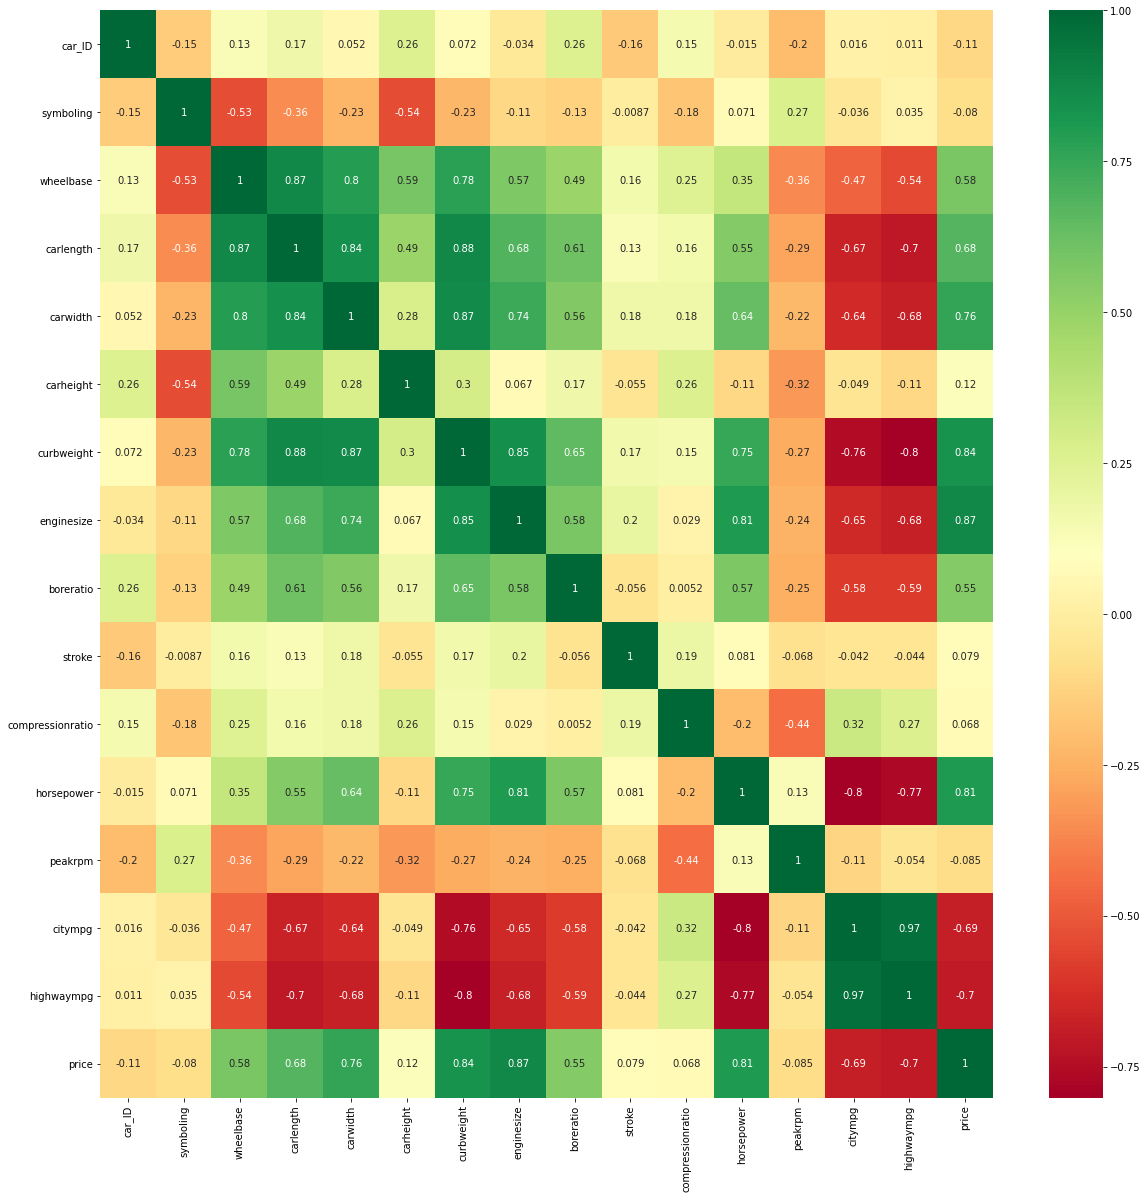

In [ ]:
# correlation of the columns
import seaborn as sns
cm = car_df.corr()
corr_feature = cm.index
plt.figure(figsize=(20,20))
f= sns.heatmap(car_df[corr_feature].corr(),annot=True, cmap='RdYlGn')

In [ ]:
car_df.drop(columns=['car_ID'], inplace= True)
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#getting columns names for onehot encoding 
car_df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
#checking data types
car_df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
#onehot encoding of categorical columns
df_cars = pd.get_dummies(car_df, columns=['CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype',
                                          'cylindernumber','fuelsystem'])
df_cars['doornumber']= df_cars['doornumber'].map({'two':2, 'four':4})

In [ ]:
df_cars.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,...,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.004878,0.004878,0.004878,0.004878,0.014634,0.004878,0.004878,0.004878,0.004878,0.009756,0.004878,0.009756,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,...,0.009756,0.004878,0.004878,0.004878,0.097561,0.902439,0.819512,0.180488,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,0.585366,0.370732,0.985366,0.014634,0.058537,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.069843,0.069843,0.069843,0.069843,0.120377,0.069843,0.069843,0.069843,0.069843,0.098531,0.069843,0.098531,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,...,0.098531,0.069843,0.069843,0.069843,0.297446,0.297446,0.385535,0.385535,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,0.493865,0.484183,0.120377,0.120377,0.235330,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
np.random.seed(255)
train_mask = np.random.rand(len(df_cars))< 0.69
train_total = df_cars[train_mask]
test_total = df_cars[~train_mask]

In [ ]:
print(train_total.shape)
print(test_total.shape)

(141, 198)
(64, 198)


In [ ]:
x_trainData = train_total.drop(columns='price')
y_trainData = train_total.loc[:, 'price']
x_testData = test_total.drop(columns='price')
y_testData = test_total.loc[:, 'price']

In [ ]:
print(x_trainData.shape)
print(x_testData.shape)
print(y_trainData.shape)
print(y_testData.shape)
display(x_trainData.head())
display(x_testData.head())

(141, 197)
(64, 197)
(141,)
(64,)


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,...,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,2,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,...,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
4,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
15,0,4,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.00,182,5400,16,22,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
17,0,4,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.00,182,5400,15,20,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
19,1,2,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.60,70,5400,38,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
21,1,2,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.41,68,5500,37,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
{x_trainData.columns.get_loc(c): c for indx, c in enumerate(x_trainData.columns)}

{0: 'symboling',
 1: 'doornumber',
 2: 'wheelbase',
 3: 'carlength',
 4: 'carwidth',
 5: 'carheight',
 6: 'curbweight',
 7: 'enginesize',
 8: 'boreratio',
 9: 'stroke',
 10: 'compressionratio',
 11: 'horsepower',
 12: 'peakrpm',
 13: 'citympg',
 14: 'highwaympg',
 15: 'CarName_Nissan versa',
 16: 'CarName_alfa-romero Quadrifoglio',
 17: 'CarName_alfa-romero giulia',
 18: 'CarName_alfa-romero stelvio',
 19: 'CarName_audi 100ls',
 20: 'CarName_audi 4000',
 21: 'CarName_audi 5000',
 22: 'CarName_audi 5000s (diesel)',
 23: 'CarName_audi fox',
 24: 'CarName_bmw 320i',
 25: 'CarName_bmw x1',
 26: 'CarName_bmw x3',
 27: 'CarName_bmw x4',
 28: 'CarName_bmw x5',
 29: 'CarName_bmw z4',
 30: 'CarName_buick century',
 31: 'CarName_buick century luxus (sw)',
 32: 'CarName_buick century special',
 33: 'CarName_buick electra 225 custom',
 34: 'CarName_buick opel isuzu deluxe',
 35: 'CarName_buick regal sport coupe (turbo)',
 36: 'CarName_buick skyhawk',
 37: 'CarName_buick skylark',
 38: 'CarName_che

# Normalization of training and testing data (x-mean)/std

In [ ]:
mean= x_trainData.loc[:,'symboling':'highwaympg'].mean(axis=0)
x_trainData.loc[:, 'symboling':'highwaympg'] -=mean
std = x_trainData.loc[:, 'symboling':'highwaympg'].std(axis=0)
x_trainData.loc[:, 'symboling':'highwaympg'] /= std
x_testData.loc[:, 'symboling':'highwaympg'] -=mean
x_testData.loc[:, 'symboling':'highwaympg'] /= std


#------------------------OR--------------------

In [ ]:
"""
x_trainData.loc[:,'symboling':'highwaympg'] = utils.normalize(x_trainData.loc[:,'symboling':'highwaympg'], axis=1)
x_testData.loc[:, 'symboling':'highwaympg'] = utils.normalize(x_testData.loc[:, 'symboling':'highwaympg'], axis=1)
display(x_trainData.head())
display(x_testData.head())
"""

"\nx_trainData.loc[:,'symboling':'highwaympg'] = utils.normalize(x_trainData.loc[:,'symboling':'highwaympg'], axis=1)\nx_testData.loc[:, 'symboling':'highwaympg'] = utils.normalize(x_testData.loc[:, 'symboling':'highwaympg'], axis=1)\ndisplay(x_trainData.head())\ndisplay(x_testData.head())\n"

Normailzation of Labels

In [ ]:
mean_label= y_trainData.mean()
y_trainData -= mean_label
std_label = y_trainData.std()
y_trainData /= std_label
y_testData -= mean_label
y_testData /= std_label

In [ ]:
x_trainData= x_trainData.values
x_testData = x_testData.values
y_trainData = y_trainData.values
y_testData = y_testData.values

In [ ]:
x_trainData.shape[1]

197

In [ ]:
from keras import models
from keras import layers
def build_model(act_function):
  model = models.Sequential()
  model.add(layers.Dense(10, activation = act_function, input_shape=(197,)))
  model.add(layers.Dense(8, activation =act_function))
  model.add(layers.Dense(6, activation = act_function))
  model.add(layers.Dense(1))
  model.compile(optimizer = 'rmsprop', loss='mse', metrics= ['mae'])
  return model

In [ ]:
build_model('relu').summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 10)                1980      
_________________________________________________________________
dense_85 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_86 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 7         
Total params: 2,129
Trainable params: 2,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# using k-fold and tanh activation function
k = 4
num_value_samples = len(x_trainData) //k
num_epochs = 100
tanh_scores = []
for i in range(k):
  print('Processing Fold No. ', i)
  val_data = x_trainData[i * num_value_samples: (i+1)* num_value_samples]
  val_targets = y_trainData[i * num_value_samples: (i+1) * num_value_samples]
  partial_train_data = np.concatenate([x_trainData[:i*num_value_samples],x_trainData[(i+1)* num_value_samples:]], axis=0)
  partial_train_targets = np.concatenate([y_trainData[:i*num_value_samples],y_trainData[(i+1)*num_value_samples:]], axis=0)
  model_tanh= build_model('tanh')
  model_tanh.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose= 0)
  val_mse, val_mae = model_tanh.evaluate(val_data, val_targets, verbose=0)
  tanh_scores.append(val_mae)

Processing Fold No.  0
Processing Fold No.  1
Processing Fold No.  2
Processing Fold No.  3


In [ ]:
# using k-fold and relue activation function
k = 4
num_value_samples = len(x_trainData) //k
num_epochs = 100
relu_scores = []
for i in range(k):
  print('Processing Fold No. ', i)
  val_data = x_trainData[i * num_value_samples: (i+1)* num_value_samples]
  val_targets = y_trainData[i * num_value_samples: (i+1) * num_value_samples]
  partial_train_data = np.concatenate([x_trainData[:i*num_value_samples],x_trainData[(i+1)* num_value_samples:]], axis=0)
  partial_train_targets = np.concatenate([y_trainData[:i*num_value_samples],y_trainData[(i+1)*num_value_samples:]], axis=0)
  model_relu = build_model('relu')
  model_relu.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose= 0)
  val_mse, val_mae = model_relu.evaluate(val_data, val_targets, verbose=0)
  relu_scores.append(val_mae)


Processing Fold No.  0
Processing Fold No.  1
Processing Fold No.  2
Processing Fold No.  3


## Regularizing the model

In [ ]:
from keras import regularizers
def model_build_regular(act_function):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act_function, kernel_regularizer= regularizers.l1_l2(l1=0.001, l2 =0.001), input_shape=(x_trainData.shape[1],)))
  model.add(layers.Dense(8, activation=act_function, kernel_regularizer= regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
  model.add(layers.Dense(6, activation= act_function, kernel_regularizer= regularizers.l1_l2(l1= 0.001, l2= 0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model



In [ ]:
model_build_regular('relu').summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 10)                1980      
_________________________________________________________________
dense_121 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_122 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 7         
Total params: 2,129
Trainable params: 2,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# k-fold regularizing
k = 4
num_value_samples = len(x_trainData) //k
num_epochs = 100
regular_scores = []
for i in range(k):
  print('Processing Fold No. ', i)
  val_data = x_trainData[i * num_value_samples: (i+1)* num_value_samples]
  val_targets = y_trainData[i * num_value_samples: (i+1) * num_value_samples]
  partial_train_data = np.concatenate([x_trainData[:i*num_value_samples],x_trainData[(i+1)* num_value_samples:]], axis=0)
  partial_train_targets = np.concatenate([y_trainData[:i*num_value_samples],y_trainData[(i+1)*num_value_samples:]], axis=0)
  model_regular = model_build_regular('relu')
  model_regular.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose= 0)
  val_mse, val_mae = model_regular.evaluate(val_data, val_targets, verbose=0)
  regular_scores.append(val_mae)

Processing Fold No.  0
Processing Fold No.  1
Processing Fold No.  2
Processing Fold No.  3


# Dropout Model

In [ ]:
def build_dropout_model(act_function):
  model = models.Sequential()
  model.add(layers.Dense(10, activation = act_function, input_shape = (x_trainData.shape[1],)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(8, activation= act_function))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(6, activation= act_function))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(1))
  model.compile(optimizer = 'rmsprop', loss= 'mse', metrics =['mae'])
  return model

In [ ]:
build_dropout_model('relu').summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 10)                1980      
_________________________________________________________________
dropout_18 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_141 (Dense)            (None, 8)                 88        
_________________________________________________________________
dropout_19 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_142 (Dense)            (None, 6)                 54        
_________________________________________________________________
dropout_20 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_143 (Dense)            (None, 1)               

In [ ]:
# k-fold dropout
k = 4
num_value_samples = len(x_trainData) //k
num_epochs = 100
dropout_scores = []
for i in range(k):
  print('Processing Fold No. ', i)
  val_data = x_trainData[i * num_value_samples: (i+1)* num_value_samples]
  val_targets = y_trainData[i * num_value_samples: (i+1) * num_value_samples]
  partial_train_data = np.concatenate([x_trainData[:i*num_value_samples],x_trainData[(i+1)* num_value_samples:]], axis=0)
  partial_train_targets = np.concatenate([y_trainData[:i*num_value_samples],y_trainData[(i+1)*num_value_samples:]], axis=0)
  model_dropout = build_dropout_model('relu')
  model_dropout.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose= 0)
  val_mse, val_mae = model_dropout.evaluate(val_data, val_targets, verbose=0)
  dropout_scores.append(val_mae)

Processing Fold No.  0
Processing Fold No.  1
Processing Fold No.  2
Processing Fold No.  3


# All Scores by above Different models

In [ ]:
# All scores of tanh activation function
tanh_scores

[0.34162217378616333,
 0.40671855211257935,
 0.48079371452331543,
 0.6865443587303162]

In [ ]:
# All scores of relu activation function
relu_scores

[0.30259042978286743,
 0.35296615958213806,
 0.43570151925086975,
 0.5023961663246155]

In [ ]:
#All scores of Regularized Model with activation function relu
regular_scores

[0.31449809670448303,
 0.3500577509403229,
 0.38104522228240967,
 0.5392971038818359]

In [ ]:
#All Scores of Dropout model with activation function relu
dropout_scores

[0.3576350212097168,
 0.4281969964504242,
 0.39666953682899475,
 0.4140985906124115]

training the model on all training data

In [ ]:
train_model_regular = model_build_regular('relu')
train_model_regular.fit(x_trainData, y_trainData, epochs = 100, batch_size = 1, verbose= 0)
test_mse_score, test_mae_score = train_model_regular.evaluate(x_testData,y_testData)
print(test_mse_score, test_mae_score )

2/2 [==============================] - 0s 3ms/step - loss: 0.1268 - mae: 0.2168
0.1268276423215866 0.21679893136024475


In [ ]:
train_dropout_model = build_dropout_model('relu')
train_dropout_model.fit(x_trainData, y_trainData, epochs = 100, batch_size = 1, verbose= 0)
test_mse_score, test_mae_score = train_dropout_model.evaluate(x_testData,y_testData)
print(test_mse_score, test_mae_score )

2/2 [==============================] - 0s 8ms/step - loss: 0.1337 - mae: 0.2860
0.13369637727737427 0.28597137331962585


In [ ]:
train_tanh_model = build_model('tanh')
train_tanh_model.fit(x_trainData, y_trainData, epochs = 100, batch_size = 1, verbose= 0)
test_mse_score, test_mae_score = train_tanh_model.evaluate(x_testData,y_testData)
print(test_mse_score, test_mae_score )

2/2 [==============================] - 0s 5ms/step - loss: 0.1825 - mae: 0.2726
0.18249011039733887 0.272613525390625


# Prediction

In [ ]:
#prediction on regular model
pre = train_model_regular.predict(x_testData[1].reshape(1,197))
print('Predicted value= ',pre)
print('actual value= ',y_testData[1])
print('Predicted value= ',pre *(std_label+mean_label))
print('actual value= ',y_testData[1] *(std_label+mean_label))


Predicted value=  [[2.005197]]
actual value=  2.3752677733606045
Predicted value=  [[41027.94]]
actual value=  48599.88740184764


In [ ]:
#prediction on dropout model
predict = train_dropout_model.predict(x_testData[1].reshape(1,197))
print('Predicted value= ',predict)
print('actual value= ',y_testData[1])

Predicted value=  [[1.9968442]]
actual value=  2.3752677733606045


In [ ]:
# prediction on k-fold regularized model
prediction = model_regular.predict(x_testData[15].reshape(1,197))
print('Prediction= ',prediction)
print('Actual= ',y_testData[15])

Prediction=  [[-0.53779936]]
Actual=  -0.23060064082249174
